CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import model
from model import Net
import utils
from utils import train, test, plot_train_metrics
from torchsummary import summary

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")

CUDA Available? False


CODE BLOCK: 3

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=train_transforms)

CODE BLOCK: 5

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
train_loader = torch.utils.data.DataLoader(test_data, **kwargs)

CODE BLOCK: 6

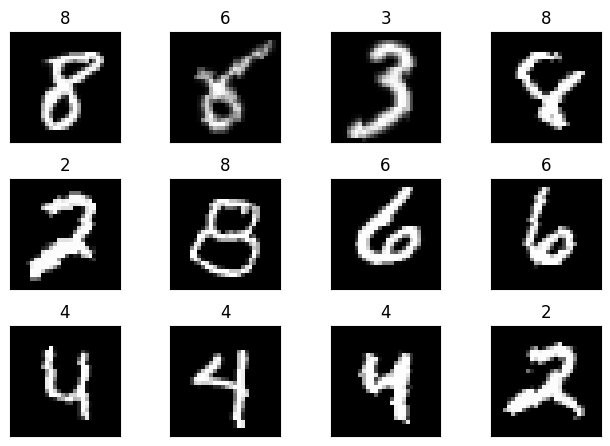

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 8

In [7]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 10

In [10]:
model = Net().to(device)
# Displaying model summary
summary(model, input_size=(1, 28, 28))
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
# New Line

num_epochs = 20
# Training and testing the model
train_losses = []
test_losses = []
train_acc = []
test_acc = []

train_criterion = F.nll_loss
test_criterion = F.nll_loss

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, train_criterion, train_losses, train_acc)
  test(model, device, test_loader, test_criterion, test_losses, test_acc)
  scheduler.step()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
Epoch 1


Train: Loss=2.2873 Batch_id=19 Accuracy=10.28: 100%|██████████| 20/20 [01:08<00:00,  3.42s/it]


Test set: Average loss: 2.2858, Accuracy: 6265/60000 (10.44%)

Epoch 2


Train: Loss=2.1907 Batch_id=19 Accuracy=14.78: 100%|██████████| 20/20 [01:06<00:00,  3.34s/it]


Test set: Average loss: 2.1556, Accuracy: 14312/60000 (23.85%)

Epoch 3


Train: Loss=3.7204 Batch_id=19 Accuracy=46.16: 100%|██████████| 20/20 [01:08<00:00,  3.43s/it]


Test set: Average loss: 2.2545, Accuracy: 20742/60000 (34.57%)

Epoch 4


Train: Loss=2.1576 Batch_id=19 Accuracy=27.90: 100%|██████████| 20/20 [01:08<00:00,  3.43s/it]


Test set: Average loss: 2.1421, Accuracy: 21595/60000 (35.99%)

Epoch 5


Train: Loss=1.0268 Batch_id=19 Accuracy=46.52: 100%|██████████| 20/20 [01:09<00:00,  3.47s/it]


Test set: Average loss: 0.9941, Accuracy: 39644/60000 (66.07%)

Epoch 6


Train: Loss=0.4628 Batch_id=19 Accuracy=78.06: 100%|██████████| 20/20 [01:07<00:00,  3.36s/it]


Test set: Average loss: 0.5183, Accuracy: 50715/60000 (84.53%)

Epoch 7


Train: Loss=0.2533 Batch_id=19 Accuracy=88.59: 100%|██████████| 20/20 [01:10<00:00,  3.51s/it]


Test set: Average loss: 0.3413, Accuracy: 53847/60000 (89.75%)

Epoch 8


Train: Loss=0.1828 Batch_id=19 Accuracy=92.38: 100%|██████████| 20/20 [01:08<00:00,  3.45s/it]


Test set: Average loss: 0.2632, Accuracy: 55318/60000 (92.20%)

Epoch 9


Train: Loss=0.2009 Batch_id=19 Accuracy=93.55: 100%|██████████| 20/20 [01:07<00:00,  3.39s/it]


Test set: Average loss: 0.2252, Accuracy: 55993/60000 (93.32%)

Epoch 10


Train: Loss=0.1139 Batch_id=19 Accuracy=94.98: 100%|██████████| 20/20 [01:07<00:00,  3.36s/it]


Test set: Average loss: 0.1951, Accuracy: 56553/60000 (94.25%)

Epoch 11


Train: Loss=0.1695 Batch_id=19 Accuracy=95.72: 100%|██████████| 20/20 [01:07<00:00,  3.40s/it]


Test set: Average loss: 0.1871, Accuracy: 56661/60000 (94.44%)

Epoch 12


Train: Loss=0.1500 Batch_id=19 Accuracy=96.01: 100%|██████████| 20/20 [01:08<00:00,  3.41s/it]


Test set: Average loss: 0.1834, Accuracy: 56770/60000 (94.62%)

Epoch 13


Train: Loss=0.1117 Batch_id=19 Accuracy=96.12: 100%|██████████| 20/20 [01:07<00:00,  3.40s/it]


Test set: Average loss: 0.1823, Accuracy: 56763/60000 (94.61%)

Epoch 14


Train: Loss=0.1575 Batch_id=19 Accuracy=95.91: 100%|██████████| 20/20 [01:10<00:00,  3.52s/it]


Test set: Average loss: 0.1822, Accuracy: 56806/60000 (94.68%)

Epoch 15


Train: Loss=0.1414 Batch_id=19 Accuracy=96.40: 100%|██████████| 20/20 [01:08<00:00,  3.40s/it]


Test set: Average loss: 0.1783, Accuracy: 56769/60000 (94.61%)

Epoch 16


Train: Loss=0.1649 Batch_id=19 Accuracy=96.35: 100%|██████████| 20/20 [01:06<00:00,  3.32s/it]


Test set: Average loss: 0.1807, Accuracy: 56827/60000 (94.71%)

Epoch 17


Train: Loss=0.1894 Batch_id=19 Accuracy=96.14: 100%|██████████| 20/20 [01:08<00:00,  3.43s/it]


Test set: Average loss: 0.1790, Accuracy: 56825/60000 (94.71%)

Epoch 18


Train: Loss=0.1325 Batch_id=19 Accuracy=96.42: 100%|██████████| 20/20 [01:07<00:00,  3.39s/it]


Test set: Average loss: 0.1724, Accuracy: 56914/60000 (94.86%)

Epoch 19


Train: Loss=0.1293 Batch_id=19 Accuracy=96.31: 100%|██████████| 20/20 [01:07<00:00,  3.37s/it]


Test set: Average loss: 0.1747, Accuracy: 56885/60000 (94.81%)

Epoch 20


Train: Loss=0.1192 Batch_id=19 Accuracy=96.29: 100%|██████████| 20/20 [01:08<00:00,  3.41s/it]


Test set: Average loss: 0.1714, Accuracy: 56926/60000 (94.88%)



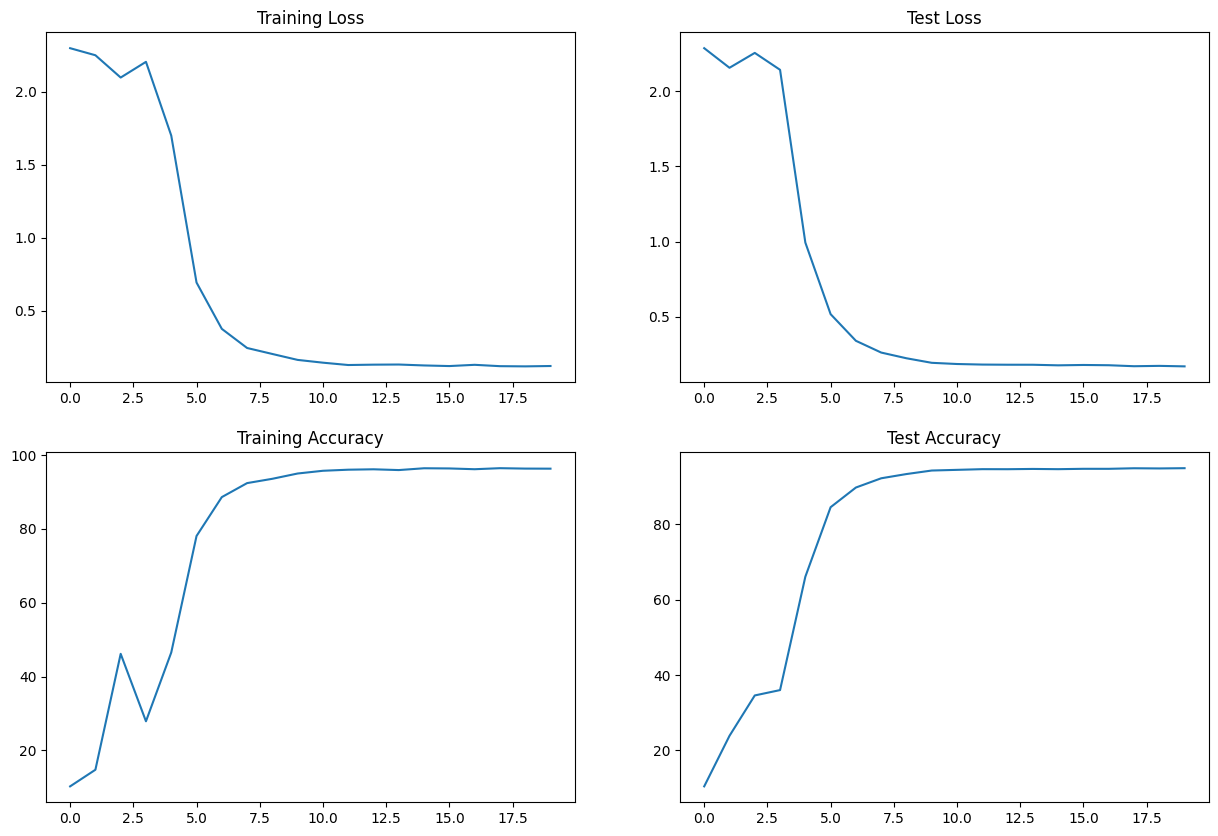

In [11]:
plot_train_metrics(train_losses, train_acc, test_losses, test_acc)